## Setting Up Environment

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

tf.random.set_seed(4)

## Load the data

In [6]:
train_path = Path("../input/fruits/fruits-360/Training")
test_path = Path("../input/fruits/fruits-360/Test")

In [7]:
# getting image path
train_image_paths = list(train_path.glob("*/*"))
# lambda expression that takes in a value and return string of the same value and maps it to all training paths
train_image_paths = list(map(lambda x: str(x), train_image_paths))

train_image_paths[:5]

['../input/fruits/fruits-360/Training/Quince/r_305_100.jpg',
 '../input/fruits/fruits-360/Training/Quince/139_100.jpg',
 '../input/fruits/fruits-360/Training/Quince/128_100.jpg',
 '../input/fruits/fruits-360/Training/Quince/r_239_100.jpg',
 '../input/fruits/fruits-360/Training/Quince/185_100.jpg']

## Preprocessing the data

In [8]:
# get respective label of image and from path
def get_label(image_path):
  return image_path.split("/")[-2]

train_image_labels = list(map(lambda x: get_label(x), train_image_paths))
train_image_labels[:5]

['Quince', 'Quince', 'Quince', 'Quince', 'Quince']

In [9]:
# label encoding - unique labels assigned to each class
from sklearn.preprocessing import LabelEncoder

Le = LabelEncoder()
train_image_labels = Le.fit_transform(train_image_labels)
train_image_labels[:5]

array([111, 111, 111, 111, 111])

In [10]:
# as multiclass model return vector as an output we have to feed as 'vector inputs' while training
# one hot encoder of a unique value
train_image_labels = tf.keras.utils.to_categorical(train_image_labels)
train_image_labels[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [11]:
from sklearn.model_selection import train_test_split

# train_paths, val_paths, train_label, val_label
X_train, X_val, y_train, y_val = train_test_split(train_image_paths, train_image_labels)

In [12]:
X_train[:5], y_train[:5]

(['../input/fruits/fruits-360/Training/Strawberry Wedge/r_176_100.jpg',
  '../input/fruits/fruits-360/Training/Maracuja/302_100.jpg',
  '../input/fruits/fruits-360/Training/Banana Lady Finger/r2_49_100.jpg',
  '../input/fruits/fruits-360/Training/Tamarillo/239_100.jpg',
  '../input/fruits/fruits-360/Training/Cherry 2/119_100.jpg'],
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

## Data Augmentation

In [13]:
# function used for transformation
def load(image, label):
  image = tf.io.read_file(image)
  image = tf.io.decode_jpeg(image, channels=3)
  return image, label

In [14]:
IMG_SIZE = 224
BATCH_SIZE = 32
AUTOTUNE = tf.data.experimental.AUTOTUNE

In [15]:
# basic transformation
resize = tf.keras.Sequential([
                              tf.keras.layers.experimental.preprocessing.Resizing(IMG_SIZE, IMG_SIZE) # 224 x 224
])

# data augmentation
data_augmentation = tf.keras.Sequential([
                                         tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
                                         tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
                                         tf.keras.layers.experimental.preprocessing.RandomZoom(height_factor=(-0.3,-0.2)) # zoon-in
])

## Creating Data Objects

In [16]:
# fuction to create a Tensorflow data object
def get_dataset(path, labels, train=True):
  # convert paths and labels to tensor
  image_paths = tf.convert_to_tensor(path)
  labels = tf.convert_to_tensor(labels)

  # create dataset objects for images and labels
  image_dataset = tf.data.Dataset.from_tensor_slices(image_paths)
  label_dataset = tf.data.Dataset.from_tensor_slices(labels)

  # zip them to be able to iterate on both at once
  dataset = tf.data.Dataset.zip((image_dataset, label_dataset))

  # apply load and resize on dataset
  dataset = dataset.map(lambda image, label: load(image, label))
  dataset = dataset.map(lambda image, label: (resize(image), label), num_parallel_calls=AUTOTUNE)

  # shuffle and batch the dataset
  dataset = dataset.shuffle(1000)
  dataset = dataset.batch(BATCH_SIZE)

  # if train = True apply data augmentation
  if train:
    dataset = dataset.map(lambda image, label: (data_augmentation(image), label), num_parallel_calls=AUTOTUNE)
  
  # if not training repeat over the dataset and return
  dataset = dataset.repeat()
  return dataset

In [17]:
# create the training data object
%time train_dataset = get_dataset(X_train, y_train)

CPU times: user 454 ms, sys: 16.8 ms, total: 470 ms
Wall time: 517 ms


In [18]:
image, label = next(iter(train_dataset))
print(image.shape) # batch size, h, w, c
print(label.shape)

(32, 224, 224, 3)
(32, 131)


Potato Sweet


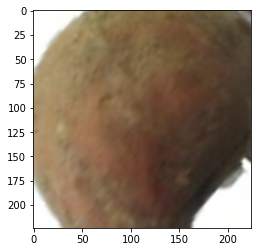

In [19]:
# view sample training image
print(Le.inverse_transform(np.argmax(label, axis=1))[0])
plt.imshow((image[0].numpy()/255).reshape(224,224,3))

In [20]:
# creating the validation object
%time val_dataset = get_dataset(X_val, y_val, train=False)

CPU times: user 34 ms, sys: 1.81 ms, total: 35.8 ms
Wall time: 35.3 ms


In [21]:
image, label = next(iter(val_dataset))
print(image.shape) # batch size, h, w, c
print(label.shape)

(32, 224, 224, 3)
(32, 131)


## Model Training  
RESNET50, INCEPTION V3, EFFICIENTNETB3

In [22]:
# building InceptionV3 model
from tensorflow.keras.applications import InceptionV3

backbone = InceptionV3(
    input_shape=(224,224,3),
    include_top=False  # not including a final layers of ResNet
)

model = tf.keras.Sequential([
                             backbone,
                             tf.keras.layers.GlobalAveragePooling2D(),
                             tf.keras.layers.Dense(131, activation='softmax')
])

model.summary()

87916544/87910968 [==============================] - 1s 0us/step
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 5, 5, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 131)               268419    
Total params: 22,071,203
Trainable params: 22,036,771
Non-trainable params: 34,432
_________________________________________________________________


In [23]:
# compiling the model by providing the Optimizer, Loss and Metrics
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07),
    loss='categorical_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Precision(name='precision'), tf.keras.metrics.Recall(name='recall')]
)

In [24]:
# training the model on training dataset and validating on validation dataset
# PHASE-I: train the whole network for one epoch and tune the weights for all layers of our model
history = model.fit(
    train_dataset,
    steps_per_epoch=len(X_train)//BATCH_SIZE,
    epochs=1,
    validation_data = val_dataset,
    validation_steps=len(y_train)//BATCH_SIZE,
    #calbacks=[checkpoint, early_stop]
)


1586/1586 [==============================] - 846s 522ms/step - loss: 1.2575 - accuracy: 0.6838 - precision: 0.8321 - recall: 0.5923 - val_loss: 3.6967 - val_accuracy: 0.4807 - val_precision: 0.5358 - val_recall: 0.4544


In [ ]:
# In the next phase, we expect our model to just learn patterns in current data.
# training on more than four epochs might results in overfitting
# then we freeze all the layers and train only on last layer where we do classification, 
# this gives more importance to the classification layer, thus making it more accurate.

In [25]:
# turnoff the backbone after tuning weights - to ensure the lesser chance of overfitting
model.layers[0].trainable = False

In [26]:
# callbacks
checkpoint = tf.keras.callbacks.ModelCheckpoint("best_weigths.h5", verbose=1, save_best=True, save_weights_only=True)
early_stop = tf.keras.callbacks.EarlyStopping(patience=4) # stop training when starts overfitting, ie, four consecutive epochs with no improvement

In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 5, 5, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 131)               268419    
Total params: 22,071,203
Trainable params: 268,419
Non-trainable params: 21,802,784
_________________________________________________________________


In [28]:
# training second phase
history = model.fit(
    train_dataset,
    steps_per_epoch=len(X_train)//BATCH_SIZE,
    epochs=8,
    validation_data = val_dataset,
    validation_steps=len(y_train)//BATCH_SIZE,
    callbacks=[checkpoint, early_stop]
)

Epoch 1/8
1586/1586 [==============================] - 666s 419ms/step - loss: 0.1246 - accuracy: 0.9621 - precision: 0.9682 - recall: 0.9567 - val_loss: 1.3741 - val_accuracy: 0.6971 - val_precision: 0.7354 - val_recall: 0.6763

Epoch 00001: saving model to best_weigths.h5
Epoch 2/8
1586/1586 [==============================] - 669s 422ms/step - loss: 0.0848 - accuracy: 0.9741 - precision: 0.9771 - recall: 0.9711 - val_loss: 2.1148 - val_accuracy: 0.6127 - val_precision: 0.6414 - val_recall: 0.5947

Epoch 00002: saving model to best_weigths.h5
Epoch 3/8
1586/1586 [==============================] - 672s 424ms/step - loss: 0.0713 - accuracy: 0.9788 - precision: 0.9813 - recall: 0.9768 - val_loss: 1.5009 - val_accuracy: 0.6678 - val_precision: 0.7018 - val_recall: 0.6482

Epoch 00003: saving model to best_weigths.h5
Epoch 4/8
1586/1586 [==============================] - 674s 425ms/step - loss: 0.0480 - accuracy: 0.9862 - precision: 0.9876 - recall: 0.9851 - val_loss: 1.0595 - val_accuracy

## Model Evaluation

In [30]:
# for loading the weights we need to unfreeze the layers
model.layers[0].trainable = True

# load the weights from the checkpoint and re-evaluate
model.load_weights("./best_weigths.h5")

In [32]:
test_image_paths = list(test_path.glob("*/*"))
test_image_paths = list(map(lambda x: str(x), test_image_paths))
test_image_labels = list(map(lambda x: get_label(x), test_image_paths))

test_image_labels = Le.fit_transform(test_image_labels) # label encoder
test_image_labels = tf.keras.utils.to_categorical(test_image_labels)

test_image_paths = tf.convert_to_tensor(test_image_paths)
test_image_labels = tf.convert_to_tensor(test_image_labels)

def decode_image(image, label):
  image = tf.io.read_file(image)
  image = tf.io.decode_jpeg(image, channels=3)
  image = tf.image.resize(image, [224,224], method="bilinear")
  return image, label

In [33]:
test_dataset = (
    tf.data.Dataset
    .from_tensor_slices((test_image_paths, test_image_labels))
    .map(decode_image)
    .batch(BATCH_SIZE)
)

In [34]:
image_label = next(iter(test_dataset))
print(image.shape)
print(label.shape)

(32, 224, 224, 3)
(32, 131)


Potato White


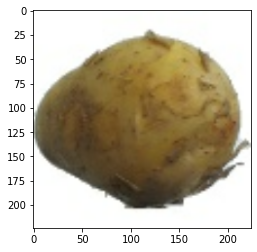

In [35]:
print(Le.inverse_transform(np.argmax(label, axis=1))[0])
plt.imshow((image[0].numpy()/255).reshape(224,224,3))

In [36]:
loss, acc, prec, rec = model.evaluate(test_dataset)

709/709 [==============================] - 162s 228ms/step - loss: 2.0019 - accuracy: 0.6555 - precision: 0.6825 - recall: 0.6406


In [37]:
print("Test Acc: ", acc)
print("Test Precision: ", prec)
print("Test Recall: ", rec)

Test Acc:  0.6555447578430176
Test Precision:  0.6825248003005981
Test Recall:  0.6405588984489441


## Real Time Prediction

In [38]:
def LoadImage(image_path):
  image = tf.io.read_file(image_path)
  image = tf.io.decode_jpeg(image, channels=3)
  image = tf.image.resize(image, [224,224], method="bilinear")
  plt.imshow(image.numpy()/255)
  image = tf.expand_dims(image, 0) # change image dims to (1,224,224,3)
  return image

def RealtimePrediction(image_path, model, encoder_):
  # model is trained model and encoder is label encode object that we fitted on training
  image = LoadImage(image_path)
  prediction = model.predict(image)
  prediction = np.argmax(prediction, axis=1) # get index having maximum value
  # decode index with label encode inverse transform function ie., numeric value to respective label
  return encode_.inverse_transform(prediction)[0] 

In [ ]:
# apply on real-time image add path, model, encoder
# RealTimePrediction("random_image/path/banana.jpg", model, Le)